In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

# Convolution in Time Domain Implementation

In [2]:
def convolution(f, g):
    """Faltung im Zeitbereich
    f, g  --  Input: Diskrete Funktionen, die gefalten werden
    """
    n = len(f)
    m = len(g)
    
    f = np.concatenate((np.zeros(m-1), np.asarray(f,dtype=float)))
    f = np.concatenate((f,  np.zeros(m-1)))
    
    result = np.zeros(n+m-1)
    for i in range(0, n+m-1):
        summe = 0
        for j in range(0,m):
            summe = summe + f[i+m-j-1]*g[j]
        result[i] = summe
    
    return result

In [3]:
#def convolution(f, g):
#    Falt = np.zeros(len(f))
#    
#    for i in range(len(f)):
#        for j in range(len(g)):
#            if i-j >= 0:
#                Falt[i] = Falt[i] + f[i-j]*g[j]
#            else:
#                Falt[i] = Falt[i] + 0
#    return Falt

# ---------------------------------------------------------------------------------------------------------------
# Test der Funktion

In [4]:
#Abtastung
def sampling(t_end, sampling_freq):
    sampling = np.linspace(0, t_end, t_end * sampling_freq, endpoint=True)
    return sampling

In [5]:
#Sinus Signal
def sine(freq, amp, sampling):
    signal = amp * np.sin(2*np.pi*freq*sampling)
    return signal

In [6]:
#Recht-Eck Signal
def sqwave(freq, amp, sampling):
    signal = amp *sig.square(sampling*freq*2*np.pi)
    return signal

In [7]:
#Plot Funktion
def plot_signal(time, signal):
    plt.figure(figsize = (10, 3))
    plt.plot(time, signal)
    plt.xlabel(r'$t$')
    plt.ylabel(r'$y$')

### Definiere zwei Testsignale und führe Faltung durch

In [8]:
fs = 40
time = sampling(2, fs)
data1 = sine(2,0.5,time)
data2 = sqwave(0.7,1,time)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


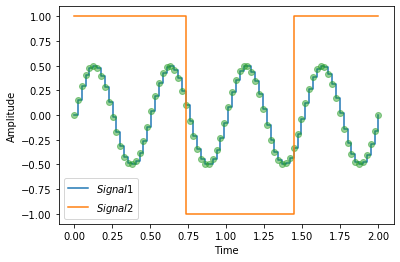

In [9]:

plt.step(time, data1, where='post', label= '$Signal 1$')
plt.plot(time, data1, 'C2o', alpha=0.5)
plt.step(time, data2, where='post', label= '$Signal 2$')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend(title='')
plt.savefig('Bilder\Faltung_Signale2.eps')
plt.show()

159
159


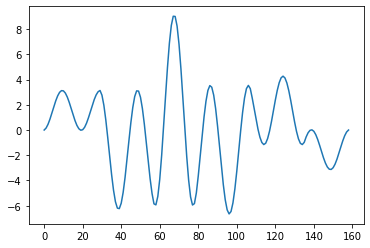

In [10]:
con_self = convolution(data1,data2)
print(len(con_self))
plt.plot(con_self)
con_py = np.convolve(data1,data2)
print(len(con_py))

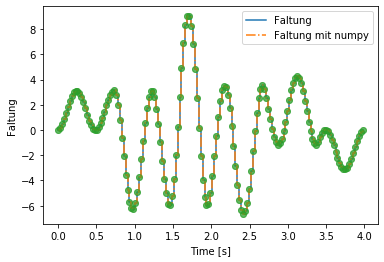

In [11]:


t_en = len(con_self)/fs
time_con = np.linspace(0, t_en, len(con_self))

plt.step(time_con, con_self, where='post', label= 'Faltung')
plt.plot(time_con, con_self, 'C2o', alpha=0.5)
plt.step(time_con, con_py,'-.', where='post', label= 'Faltung mit numpy')
plt.plot(time_con, con_py, 'C2o', alpha=0.5)
plt.legend(title='')
plt.xlabel('Time [s]')
plt.ylabel('Faltung')
plt.show()

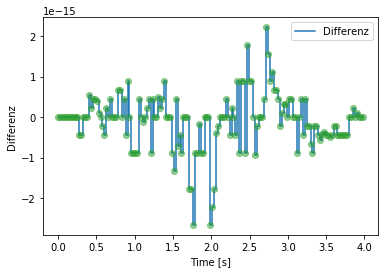

In [12]:
diff = con_self - con_py

plt.step(time_con, diff,'-', where='post', label= 'Differenz')
plt.plot(time_con, diff, 'C2o', alpha=0.5)

plt.legend(title='')
plt.xlabel('Time [s]')
plt.ylabel('Differenz')
plt.show()

Die Faltung stimmt mit der Faltung des numpy Moduls np.convolce(X) sehr gut überein!
Die Differenz zwischen den Werten der selbst geschriebenen Funktion und des numpy Moduls befinden sich im 1E-12 Bereich, sind demnach sehr klein.